# Testing out data augmentations for better performance
- This is just to test out data augmentations. There's a lot of duplicate code from data_processing notebook.

In [1]:
from datasets import Dataset, DatasetDict, load_from_disk
import pandas as pd
import numpy as np
random_state = 1234
import matplotlib.pyplot as plt
import os

In [2]:
dataset = load_from_disk("./datasets/cleaned_hf/merged_hf")

In [3]:
train_df = dataset['train'].to_pandas()

In [4]:
train_df

,text,labels
0,My favourite food is anything I didn't have to...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"Now if he does off himself, everyone will thin...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,WHY THE FUCK IS BAYLESS ISOING,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,To make her feel threatened,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Dirty Southern Wankers,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
83011,.@Travelanswerman: The possibilities R endless...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
83012,You have a #problem? Yes! Can you do #somethin...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83013,@andreamitchell said @berniesanders not only d...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
83014,@isthataspider @dhodgs i will fight this guy! ...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [5]:
def filter_labels(x, exclude_labels):
    for i in range(len(x)):
        if i in exclude_labels and x[i] == 1:
            return False
    return True

In [6]:
# v3 dataset (text augment lables w/ < 4500 samples)
# neutral, sadness, joy, love, anger
freq_gte_4500 = [27, 25, 17, 18, 2]

# Filter the dataframe for labels with frequency < 4500
train_minority_labels = train_df[train_df['labels'].apply(
    lambda x: filter_labels(x, freq_gte_4500))]

train_minority_labels

,text,labels
3,To make her feel threatened,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Dirty Southern Wankers,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Yes I heard abt the f bombs! That has to be wh...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,We need more boards and to create a bit more s...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...
83003,@VanDashNessa @taotao_salupa5 Nobody in that s...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."
83005,These #NewEnglandPatriots jerseys look like so...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83006,@emorottie true sonicsatam was serious and a b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83013,@andreamitchell said @berniesanders not only d...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
from textattack.augmentation import EasyDataAugmenter, CheckListAugmenter

In [14]:
augmenter = EasyDataAugmenter()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\skpar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
# create dataset for each emotion label
def augment_data(df, augmenter): 
    augmented_df = df.copy()

    # augmentation
    augmented_df['text'] = augmented_df['text'].apply(lambda x: augmenter.augment(x)[0])

    return augmented_df

In [16]:
augmented_train = augment_data(train_minority_labels, augmenter)
augmented_train

,text,labels
3,To flavour make her feel threatened,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Southern Dirty Wankers,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Yes I heard abt the f bombs! That has to be wh...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,We need more boards and to create a bit more s...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...
83003,@VanDashNessa @taotao_salupa5 Nobody in that s...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."
83005,These #NewEnglandPatriots jerseys look like so...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83006,@emorottie truthful sonicsatam was serious and...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83013,@andreamitchell said @berniesanders not only d...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [17]:
# checking if original dataset and augmented dataset have same labels
all(train_minority_labels['labels'] == augmented_train['labels'])

True

In [18]:
v3_aug = load_from_disk("./datasets/cleaned_hf/augmented_hf")

In [19]:
v3_aug

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 88944
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 10426
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 12721
    })
})

In [20]:
train_df = v3_aug['train'].to_pandas()
val_df = v3_aug['validation'].to_pandas()
test_df = v3_aug['test'].to_pandas()

In [21]:
# merge and shuffle original and augmented datasets
augmented_merged = pd.concat([train_df, augmented_train], axis=0, ignore_index=True)

# shuffle
augmented_merged = augmented_merged.sample(frac=1, random_state=random_state).reset_index(drop=True)
augmented_merged

,text,labels
0,I see that the facebook and twitter crowd is l...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,i feel you jerked a little the at surprised ha...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,And it was out of their control as well for bo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Oh god I thought he career was lang over,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,Or In my blood by [NAME]😅,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
118282,I don't to want really do anything.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
118283,im feeling a bit jaded,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
118284,More like the in-law that nobody likes.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
118285,Translation: you should see her vagina! She ca...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [22]:
# only get labels where labels < 2000 in train freq graph
# relief (23), confusion (6), disappointment (9), realization (22), caring (5), excitement (13), desire (8), remorse (24), embarrassment (12), nervousness (19), pride (21), grief (16)

# freq >= 2000: 0, 1, 2, 3, 4, 7, 10, 11, 14, 15, 17, 18, 20, 25, 26, 27
freq_gte_2000 = [0, 1, 2, 3, 4, 7, 10, 11, 14, 15, 17, 18, 20, 25, 26, 27]

# Filter the dataframe for labels with frequency < 2000 (based on non-augmented train)
train_df_minority = train_df[train_df['labels'].apply(
    lambda x: filter_labels(x, freq_gte_2000))]

train_df_minority

,text,labels
2,I asked at the Bodies Reveled show if they use...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
6,This is the day we've been await for! WWOOOOOO...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
18,we were frauded the whole time about how pure ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
26,I can't imagine it's going to be easy to come ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
58,we were frauded the whole time about how pure ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...
88892,Kind of upsets me that people are so willing t...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
88897,had a fun day at the theatre... delighted to b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
88912,"@shelleyellie Aw, thanks. Slowly getting over ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
88915,Every government in the world charges these fe...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [24]:
from textattack.augmentation import CharSwapAugmenter

In [25]:
# checklist augmenter to certain minority labels
augmenter = CharSwapAugmenter()
augmented_train = augment_data(train_minority_labels, augmenter)
augmented_train

,text,labels
3,To make her feel threaFened,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Dqrty Southern Wankers,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Yes I heard abt the f bombs! Taht has to be wh...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,We nTed more boards and to create a bit more s...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...
83003,@VanDashNessa @taotao_salupa5 Nobody in that s...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."
83005,These #NewEnglandPatriots jerseys look like so...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83006,@emorottie true sonicsatam was serious and a i...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83013,@andreamitchell said @berniesanders not only d...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:
all(train_minority_labels['labels'] == augmented_train['labels'])

True

In [27]:
# merge and shuffle original and augmented datasets
augmented_merged = pd.concat([augmented_merged, augmented_train], axis=0, ignore_index=True)

# shuffle
augmented_merged = augmented_merged.sample(frac=1, random_state=random_state).reset_index(drop=True)
augmented_merged

,text,labels
0,"mean, he is a terrible president.","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,Everyone is born an atheist. Some gets afflict...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"I waited 15 jours for this joke, I'm so proud ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Poor kid. He just wanetd to rescue his mum fro...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,i feel it is vital to make the most of that da...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
147625,i hadnt been at my parents place for a long ti...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
147626,I can't mourn Kid Cudi cause we have Travis Sc...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
147627,"After Ohtani, I can't bring myself to believe ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
147628,"Ok, I'm awake. I'm awake. I think.","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [29]:
def create_freq_dict(df, labels, desc=True):
    freq = np.sum(df['labels'], axis=0)
    
    freq_dict = {}
    for i, emo in enumerate(labels):
        freq_dict[emo] = freq[i]

    # if descending order requested
    if desc:
        freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))

    return freq_dict

In [30]:
def plot_freq(freq_dict, df_type):
    """
    freq_dict: frequency dictionary
    df_type: train/val/test
    """

    # Plotting the frequency graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(freq_dict.keys(), freq_dict.values(), color='skyblue')
    plt.xlabel('Emotions')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Emotions ({df_type})')
    plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()

    # Add frequency numbers on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)

    plt.show()

In [31]:
labels = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

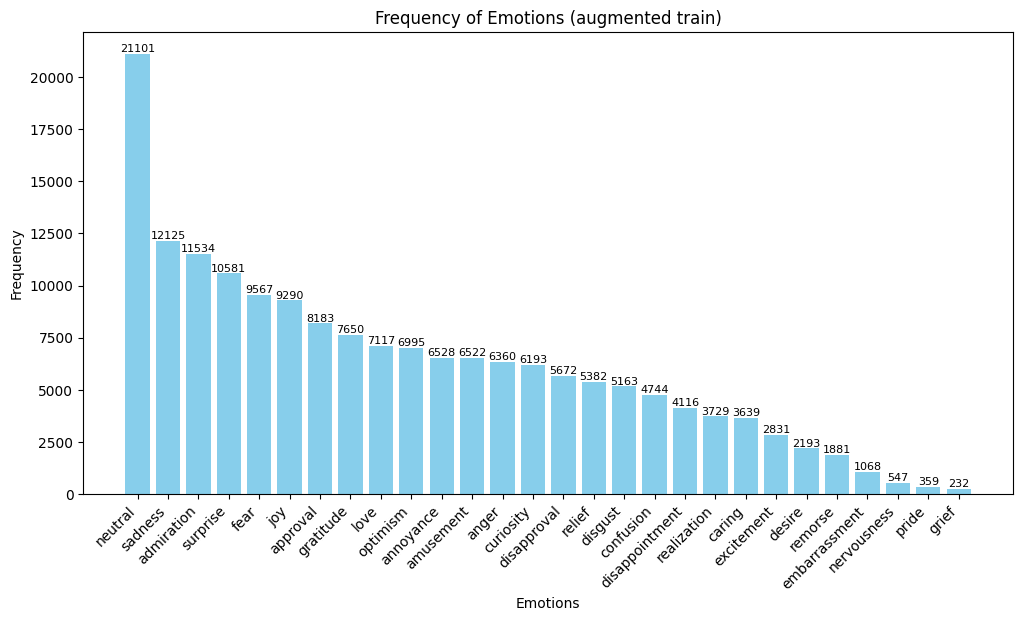

In [32]:
desc_freq = create_freq_dict(augmented_merged, labels, desc=True)
plot_freq(desc_freq, "augmented train")

In [33]:
# convert to huggingface dataset into 3 splits (train/val/test)
def split_convert2hf_dataset(train, val=None, test=None, random_state=1):
    # if train and val passed (no test), val becomes test
    if val is not None and test is None:
        test = val
        val = None

    train_hf_df = Dataset.from_pandas(train)

    # if there's test dataset
    if test is not None:
        test_hf_df = Dataset.from_pandas(test)

    # if there's no validation set
    if val is None:
        # 80% train, 20% test + val
        train_valtest = train_hf_df.train_test_split(test_size=0.2, seed=random_state)

        train_hf_df = train_valtest['train']
        val_hf_df = train_valtest["test"]

        # if no validation and test sets
        if test is None:
            # Split the 20% test + val in half val, half test
            val_test = train_valtest["test"].train_test_split(test_size=0.5, seed=random_state)

            val_hf_df = val_test["train"]
            test_hf_df = val_test["test"]
    else:
        # if val and test datasets provided
        val_hf_df = Dataset.from_pandas(val)
        test_hf_df = Dataset.from_pandas(test)


    return DatasetDict({
    'train': train_hf_df,
    'validation': val_hf_df,
    'test': test_hf_df
    })

In [34]:
# pandas df to hf dataset
augmented_hf = split_convert2hf_dataset(augmented_merged, val_df, test_df, random_state)
augmented_hf

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 147630
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 10426
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 12721
    })
})

In [35]:
# function to save hf dataset on disk
def save_hf_dataset(file_path, dataset):
    # only save when file doesn't exist
    if not os.path.exists(file_path):
        dataset.save_to_disk(file_path)
    else:
        print("Dataset already exists.")

In [36]:
file_name = 'augmented_hf_v3'
file_path = f'./datasets/cleaned_hf/{file_name}'
save_hf_dataset(file_path, augmented_hf)

Saving the dataset (0/1 shards):   0%|          | 0/147630 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10426 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12721 [00:00<?, ? examples/s]